In [11]:
##TODO:
#Trimmed data: Remove id column as well? -> doesn't really add anything to the data

In [14]:
##NECESSARY IMPORTS
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [8]:
##LOAD DATA INTO DATAFRAME
all_data = pd.read_csv('data.csv')


##CHECK DATA
'''
all_data.shape
all_data.head()
all_data.describe()
'''
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
##REMOVE 32 ROW AS DATA IS NAN 
trimmed_data = all_data.drop(columns = ['Unnamed: 32', 'id'])

##GET CORRELATION
data_corr = trimmed_data.corr()

##CHECK DATA -> 32 column should be removed 
'''
trimmed_data.shape
trimmed_data.head()
trimmed_data.describe()
'''

trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

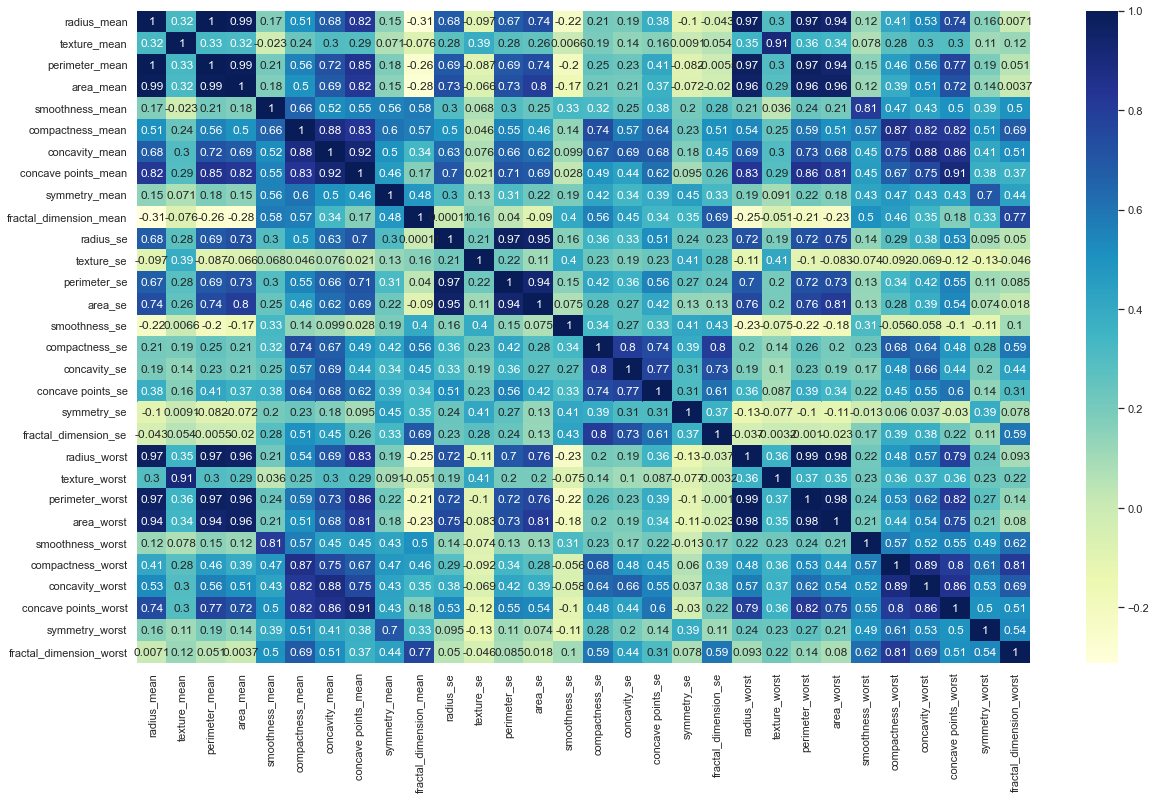

In [20]:
##SHOW HEATMAP OF CORRELATION
sns.set(rc={'figure.figsize': (20, 12)})
sns.heatmap(data_corr,annot = True,cmap="YlGnBu")
plt.show()